In [1]:
from __future__ import division
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
def entropy_1d(x, bins=100):
#     n, bins, patches = hist(x, bins=100)
#     print('xx', histogram(x, bins=bins))
    n, bins_res = histogram(x, bins=bins)    
#     print('n', n)
#     print('bins', bins)
    bin_w = bins_res[1] - bins_res[0]
    n = n[n>0]
    p = n/sum(n)
#     print('p', p)
    ent = -sum(p*log(p/bin_w))
    return ent
    
def entropy_norm(sig):
    return log(sig*sqrt(2*pi*e))

('ent_est', 3.7115633890818529)
('ent_anal', 3.7215236261987181)


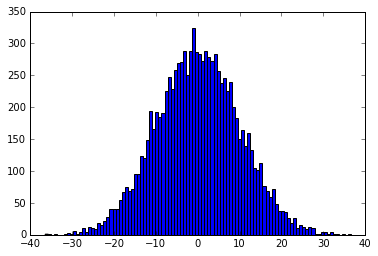

In [205]:
# 1-d entropy with Gaussian distribution
N = 10000
sig = 10
x = sig * random.randn(N)
a = hist(x, bins=100)
print('ent_est', entropy_1d(x, bins=100))
print('ent_anal', entropy_norm(sig))
show()


C:\Users\nati\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


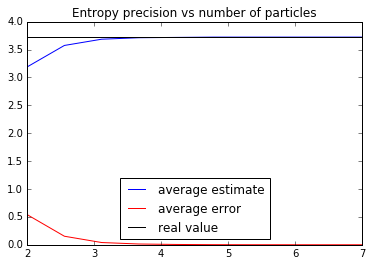

In [130]:
# 1-d entropy with Gaussian distribution
# examining influence of the number of particles
sig = 10
estimate = []
error = []
actual = []
N = linspace(2, 7, 10)
REPS = 10
for i in N:
    est = 0
    err = 0
    real = entropy_norm(sig)
    for rep in range(REPS):
        n = 10**i
        x = sig * random.randn(n)
        res = entropy_1d(x)
        err += (real - res)**2
        est += res
         
    error.append(sqrt(err/REPS))
    estimate.append(est/REPS)
    actual.append(real)
    
figure(1)
title('Entropy precision vs number of particles')
error = array(error)
estimate = array(estimate)
plot(N, estimate, 'b')
plot(N, error, 'r')
plot(N, actual, 'k')
# plot(N, estimate+error, 'r--')
legend(['average estimate', 'average error', 'real value'], loc='lower center')
    
show()


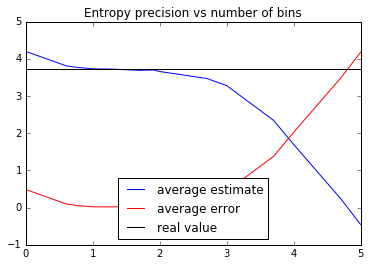

In [217]:
# 1-d entropy with Gaussian distribution
# examining influence of the number of bins
# number of particles strongly affects the optimal number of bins
sig = 10
estimate = []
error = []
actual = []
REPS = 10
n = 1000
BINS = [1, 4, 6, 10, 20, 50, 80, 100, 500, 1000, 5000, 10000, 50000, 100000]
for bins in BINS:
    est = 0
    err = 0
    real = entropy_norm(sig)
    for rep in range(REPS):
        particles = n
        x = sig * random.randn(particles)
        res = entropy_1d(x, bins=bins)
        err += (real - res)**2
        est += res
        
    error.append(sqrt(err/REPS))
    estimate.append(est/REPS)
    actual.append(real)
    
figure(1)
title('Entropy precision vs number of bins')
error = array(error)
estimate = array(estimate)
plot(log10(BINS), estimate, 'b')
plot(log10(BINS), error, 'r')
plot(log10(BINS), actual, 'k')
# plot(BINS, estimate+error, 'r--')
legend(['average estimate', 'average error', 'real value'], loc='lower center')
    
show()


C:\Users\nati\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nati\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


('real', 3.7269162462640626)
('est', 3.7223285511844155)


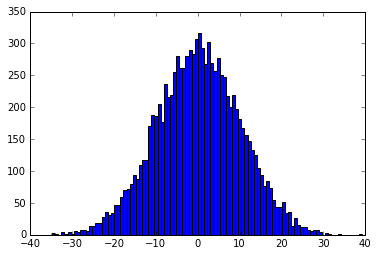

In [196]:
# 1-d entropy with Gaussian distribution
# considerations of multimodal distributions
# two Gaussian distributions spaced apart
n = 10000
sig = 10
spacing = 0
x1 = sig * random.randn(n/2)
x2 = sig * random.randn(n/2) + spacing
x = concatenate((x1, x2))

a = hist(x, bins=100)

sigma = var(x)
real = entropy_norm(sqrt(sigma))
est = entropy_1d(x, bins=100)

print('real', real)
print('est', est)


C:\Users\nati\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nati\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nati\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nati\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


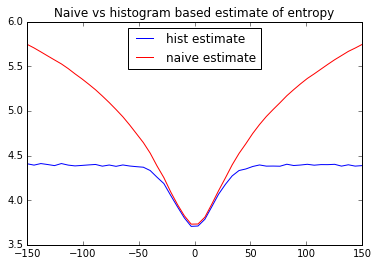

In [209]:
# 1-d entropy with Gaussian distribution
# considerations of multimodal distributions
# two Gaussian distributions spaced apart
n = 10000
sig = 10
x1 = sig * random.randn(n/2)
x2 = sig * random.randn(n/2)

naive_approx = []
estimate = []
SPACINGS = linspace(-150, 150, 50)

for spacing in SPACINGS:
    x1 = sig * random.randn(n/2)
    x2 = sig * random.randn(n/2) + spacing
    x = concatenate((x1, x2))
    
    sigma = sqrt(var(x))
    naive_approx.append(entropy_norm(sigma))
    estimate.append(entropy_1d(x, bins=500))
#     figure(spacing)
#     a = hist(x, bins=100)

figure(1)
title('Naive vs histogram based estimate of entropy')
plot(SPACINGS, estimate, 'b')
plot(SPACINGS, naive_approx, 'r')


legend(['hist estimate', 'naive estimate'], loc='upper center')
    
show()    

In [213]:
numpy.__version__

'1.11.0'